In [ ]:
library(vegan)
library(ggplot2)

In [ ]:
#uploading metadata (First Column might be "Sample.ID")
tab <- read.csv("../T1_SMDS_metadata_ms.txt",sep="\t",check.names=FALSE, stringsAsFactors=F)
head(tab)

In [3]:
#uploading the distance matrix
d <- read.table("../rpca/T2-rpca-r3-dm.tsv")
head(d)

,A1.lyPMA,A4.lyPMA,A1.raw,A2.lyPMA,A2.raw,A3.lyPMA,A3.raw,A4.raw,A5.lyPMA,A5.raw,...,J5.lyPMA,J5.raw,J6.lyPMA,J6.raw,J7.lyPMA,J7.raw,J8.lyPMA,J8.raw,J9.lyPMA,J9.raw
A1.lyPMA,0.0000000,1.3378182,0.2403278,0.7651308,0.8920501,0.4386692,0.2848043,0.5748746,0.3417443,0.3586265,...,3.628070,3.763673,3.640396,3.886301,4.139309,4.150450,3.699668,4.036110,3.972365,4.040838
A4.lyPMA,1.3378182,0.0000000,1.4455914,0.6633946,0.4936941,1.1601239,1.0792807,0.9151657,1.5919608,1.5466278,...,3.485325,3.804907,3.726239,3.894959,3.898574,4.002277,3.623035,4.055317,3.640279,3.721209
A1.raw,0.2403278,1.4455914,0.0000000,0.8638654,0.9746949,0.6693119,0.3906673,0.5777724,0.1616066,0.1285435,...,3.445925,3.560201,3.432765,3.684597,3.965127,3.964620,3.508497,3.832772,3.810436,3.876101
A2.lyPMA,0.7651308,0.6633946,0.8638654,0.0000000,0.2202844,0.6464781,0.4888405,0.4319619,0.9885514,0.9553387,...,3.463330,3.699046,3.590955,3.797682,3.932252,3.988227,3.563050,3.959521,3.705285,3.771924
A2.raw,0.8920501,0.4936941,0.9746949,0.2202844,0.0000000,0.8022169,0.6151409,0.4476872,1.1146610,1.0678320,...,3.353440,3.611972,3.513496,3.710703,3.810323,3.878778,3.465302,3.871521,3.578826,3.651694
A3.lyPMA,0.4386692,1.1601239,0.6693119,0.6464781,0.8022169,0.0000000,0.4274150,0.7192163,0.7540695,0.7815570,...,3.918342,4.094660,3.976444,4.209294,4.412913,4.444595,4.002946,4.364113,4.218386,4.287507


In [4]:
# need to make sure distance matrix and metadata are in same order!
tab = tab[match(rownames(d),tab$'#SampleID'),]

In [5]:
# Perform PCoA
transf2 <- cmdscale(d, k=3, eig = TRUE)
### I don't think these numebrs are right since its not PCoA but PCA.... ?

In [6]:
#%Variance explained by axis
(transf2$eig/sum(transf2$eig))[1:5]

[1] 4.931641e-01 4.919902e-01 1.484570e-02 3.007799e-16 2.725684e-17

In [7]:
head(tab)

,#SampleID,study_acronym,experiment_name,participant_id,saliva_weight_g,saliva_volume_mL_collected_in_5_min,saliva_flow_rate_mL_per_min,FC_cells_per_ul_r1,FC_cells_per_ul_r2,FC_avg_cells_per_ul,...,qPCR_median_16S_copies_per_2ul_DNA,alcohol_since_last_sample,misc-notes,food,food notes,drink notes,self_reported_min_brushing,floss_regularly?,toothbrush_type,percent_reads_aligning_to_chloroplast_seqeuneces
1,A1.lyPMA,SMDS,daily dynamics,A,1.28,1.1,0.22,13268,12489,12879,...,5374744,none,none,no,none,none,3,yes,electric,0
4,A4.lyPMA,SMDS,daily dynamics,A,1.62,1.4,0.28,5606,5553,5580,...,62065,none,none,yes,burrito and salsa,none,3,yes,electric,0
89,A1.raw,SMDS,daily dynamics,A,1.28,1.1,0.22,27508,22654,25081,...,25843585,none,none,no,none,none,3,yes,electric,0
2,A2.lyPMA,SMDS,daily dynamics,A,1.41,1.1,0.22,9742,10925,10334,...,102428,none,none,no,none,none,3,yes,electric,0
90,A2.raw,SMDS,daily dynamics,A,1.41,1.1,0.22,11753,9189,10471,...,487646,none,none,no,none,none,3,yes,electric,0
3,A3.lyPMA,SMDS,daily dynamics,A,2.10,1.9,0.38,1747,1723,1735,...,1228159,none,none,yes,donut,none,3,yes,electric,0


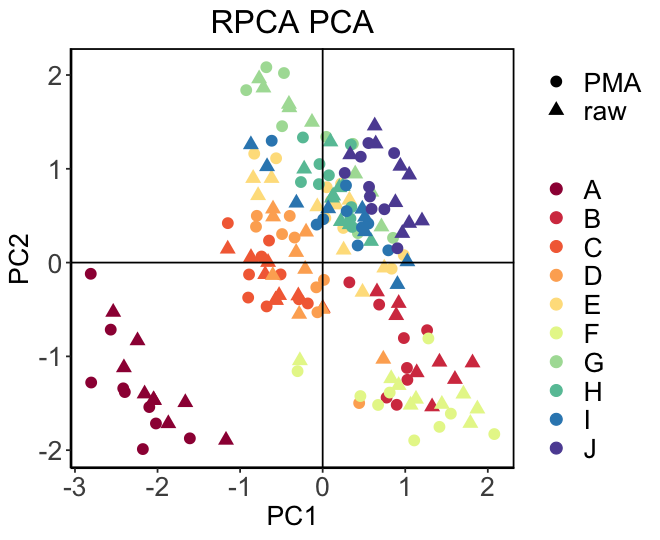

In [9]:
# Select a metadata column from your original matrix
clustid <- tab[,4]  #color by participant
shapeid <- tab[,12]  #shape by processing method
options(repr.plot.width=5.5, repr.plot.height=4.5)

#need check with Cristal the colors...
my_palette <- c('#9e0142', '#d53e4f', '#f46d43', '#fdae61', '#fee08b', '#e6f598', '#abdda4', '#66c2a5', '#3288bd', '#5e4fa2')


# to select different combinations of components do transf2$points[,c(1,3)]
transf3 <- as.data.frame(transf2$points[,c(1,2)])
colnames(transf3) <- c("Dim_1", "Dim_2")
p <- ggplot(transf3, aes(Dim_1, Dim_2, color=factor(clustid), shape=factor(shapeid)))
        p <- p + 
        geom_point(size = 3) + 
        scale_color_manual(values = my_palette) +
        geom_hline(yintercept=0) +
        geom_vline(xintercept=0) +
        labs(x ="PC1", 
             y = "PC2",
             title = "RPCA PCA") +
        theme_classic() +
        theme(legend.title=element_blank(), 
              panel.background = element_blank(),
              panel.border = element_rect(colour = "black", fill=NA, size=1),
              plot.title = element_text(hjust = 0.5),
              text = element_text(size=16),
              axis.text.x = element_text(size=16),
              axis.text.y = element_text(size=16),
              legend.text=element_text(size=16)
             )
print(p)

In [10]:
ggsave(file="~/Dropbox/Lisa_stuff/Thesis/publications/Saliva_quant/mSystems_figures/SMDS_pcoa2D.pdf", 
       plot=p,
       height=7,
       width=10)